code adapted from https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers

In [37]:
# Import standard data manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('ggplot')

# Import NLP libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download necessary datasets for nltk
nltk.download('punkt')          # Tokenizers
nltk.download('vader_lexicon')  # Lexicon for Sentiment Analysis

# Import progress bar utility
from tqdm.notebook import tqdm

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
from transformers import pipeline

# Define the model path
model_path = "cardiffnlp/twitter-roberta-base-sentiment"

# Load the sentiment analysis pipeline
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

# Perform sentiment analysis
result = sentiment_task("only loosers would buy gamestop")

print(result)

[{'label': 'LABEL_1', 'score': 0.5420903563499451}]


In [39]:
# Read in data
df = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT LG/03_labelled_GPT_upsampled_.csv')
print(df.shape)
#df = df.head(500)
#print(df.shape)

(5443, 3)


In [40]:
df.head()

,id,Text,Intent
0,t3_l71j1l,GME &amp; BB are not on cashapp but AMC &amp; ...,i
1,t3_ki3745,"Oh GME, you tease!",u
2,t3_la75n9,"Dump gme, amc, nok, and bb so we can all buy s...",u
3,t3_lw6hoh,Not a single decent DD posted? 9 billion in re...,u
4,t3_l9xqem,Just got into $GME @ 220.,y


In [41]:
df.shape

(5443, 3)

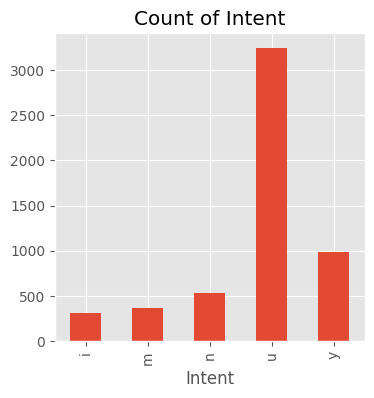

In [42]:
ax = df['Intent'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Intent',
          figsize=(4, 4))
ax.set_xlabel('Intent')
plt.show()

In [43]:
example = df['Text'][50]
print(example)

WTF I was charging getting in this post. Apparently we all here apes that just love GME stonk!I am HOLDing and planning to tell the story of 💎🙌 to next generations of retards 🙃


In [46]:
# VADER results on example
print(example)
sia.polarity_scores(example)

WTF I was charging getting in this post. Apparently we all here apes that just love GME stonk!I am HOLDing and planning to tell the story of 💎🙌 to next generations of retards 🙃


{'neg': 0.124, 'neu': 0.769, 'pos': 0.108, 'compound': -0.1593}

In [45]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [78]:
# RoBERTa sentiment analyser

In [44]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [47]:
# Run for Roberta Model for one example to test it
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.22694483, 'roberta_neu': 0.45125982, 'roberta_pos': 0.32179534}


In [48]:
# Define RoBERTa function to iterate through df rows

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [81]:
# VADER and RoBERTa sentiment - to lable the dataframe with sentiment ratings (takes a long time!)

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['id']
        vader_result = sia.polarity_scores(text) # SIA polarity scores
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text) # RoBERTa results
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5443 [00:00<?, ?it/s]

Broke for id t3_l70sjp
Broke for id t3_l856qs
Broke for id t3_l74zgc
Broke for id t3_l8rf4k
Broke for id t3_l6zpes
Broke for id t3_l7hywo
Broke for id t3_kxenqf
Broke for id t3_l7sx8h
Broke for id t3_l86h74
Broke for id t3_l75pa1
Broke for id t3_l0hnrw
Broke for id t3_l69yr8
Broke for id t3_layuxv
Broke for id t3_l6cb1x
Broke for id t3_l7bat6
Broke for id t3_l7vz0d
Broke for id t3_lah9pc
Broke for id t3_l75yoy
Broke for id t3_m5behh
Broke for id t3_l7ahyf
Broke for id t3_n0h35b
Broke for id t3_l7xrab
Broke for id t3_k9lfz7
Broke for id t3_l7lihy
Broke for id t3_l6uas9
Broke for id t3_l7nx7t
Broke for id t3_l70b59
Broke for id t3_l6vhvn
Broke for id t3_l74yct
Broke for id t3_m27zg5
Broke for id t3_l8sn9v
Broke for id m2jt64
Broke for id ra99fc
Broke for id lwu1gg
Broke for id pg1z5y


In [83]:
# Recording the results in new columns in results_df
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [84]:
results_df.head(10)

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Text,Intent
0,t3_l71j1l,0.0,1.0,0.0,0.0,0.077612,0.861043,0.061345,GME &amp; BB are not on cashapp but AMC &amp; ...,i
1,t3_ki3745,0.0,1.0,0.0,0.0,0.647058,0.334336,0.018606,"Oh GME, you tease!",u
2,t3_ki3745,0.0,1.0,0.0,0.0,0.647058,0.334336,0.018606,Guys I'm sorry I didn't believe in you.. pleas...,y
3,t3_ki3745,0.0,1.0,0.0,0.0,0.647058,0.334336,0.018606,Dude it’s a fucking $1b market cap about to be...,u
4,t3_ki3745,0.0,1.0,0.0,0.0,0.647058,0.334336,0.018606,My account went from 7k to 25k from GME and TS...,y
5,t3_ki3745,0.0,1.0,0.0,0.0,0.647058,0.334336,0.018606,GME calls are up 1000% this is the short squee...,u
6,t3_ki3745,0.0,1.0,0.0,0.0,0.647058,0.334336,0.018606,GME SQOOOOZE,u
7,t3_ki3745,0.0,1.0,0.0,0.0,0.647058,0.334336,0.018606,Hey guys say what you want about Gamestop ($GM...,u
8,t3_ki3745,0.0,1.0,0.0,0.0,0.647058,0.334336,0.018606,GME SQEEUZING,u
9,t3_ki3745,0.0,1.0,0.0,0.0,0.647058,0.334336,0.018606,Come on GME. Break 20. That’s when it gets int...,u


In [85]:
# Checking the value counts again
value_counts = results_df['Intent'].value_counts()
print(value_counts)

u    3233
y     983
n     529
m     368
i     309
Name: Intent, dtype: int64


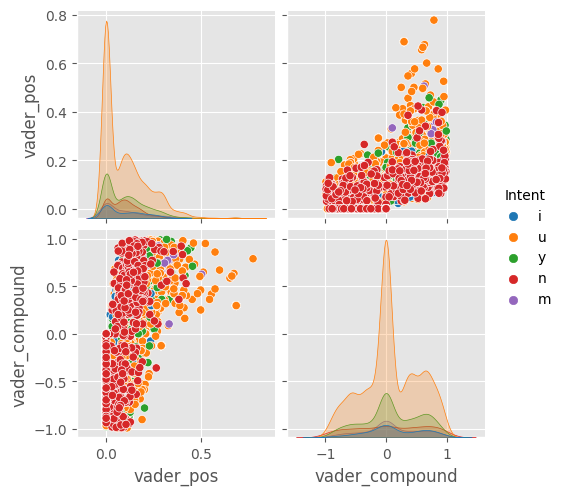

In [86]:
sns.pairplot(data=results_df,
             vars=['vader_pos',
                   'vader_compound'],
            hue='Intent',
            palette='tab10')
plt.show()

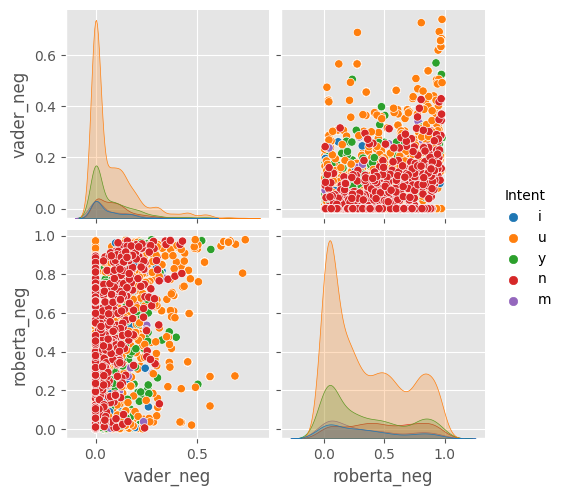

In [87]:
sns.pairplot(data=results_df,
             vars=['vader_neg',
                  'roberta_neg'],
            hue='Intent',
            palette='tab10')
plt.show()

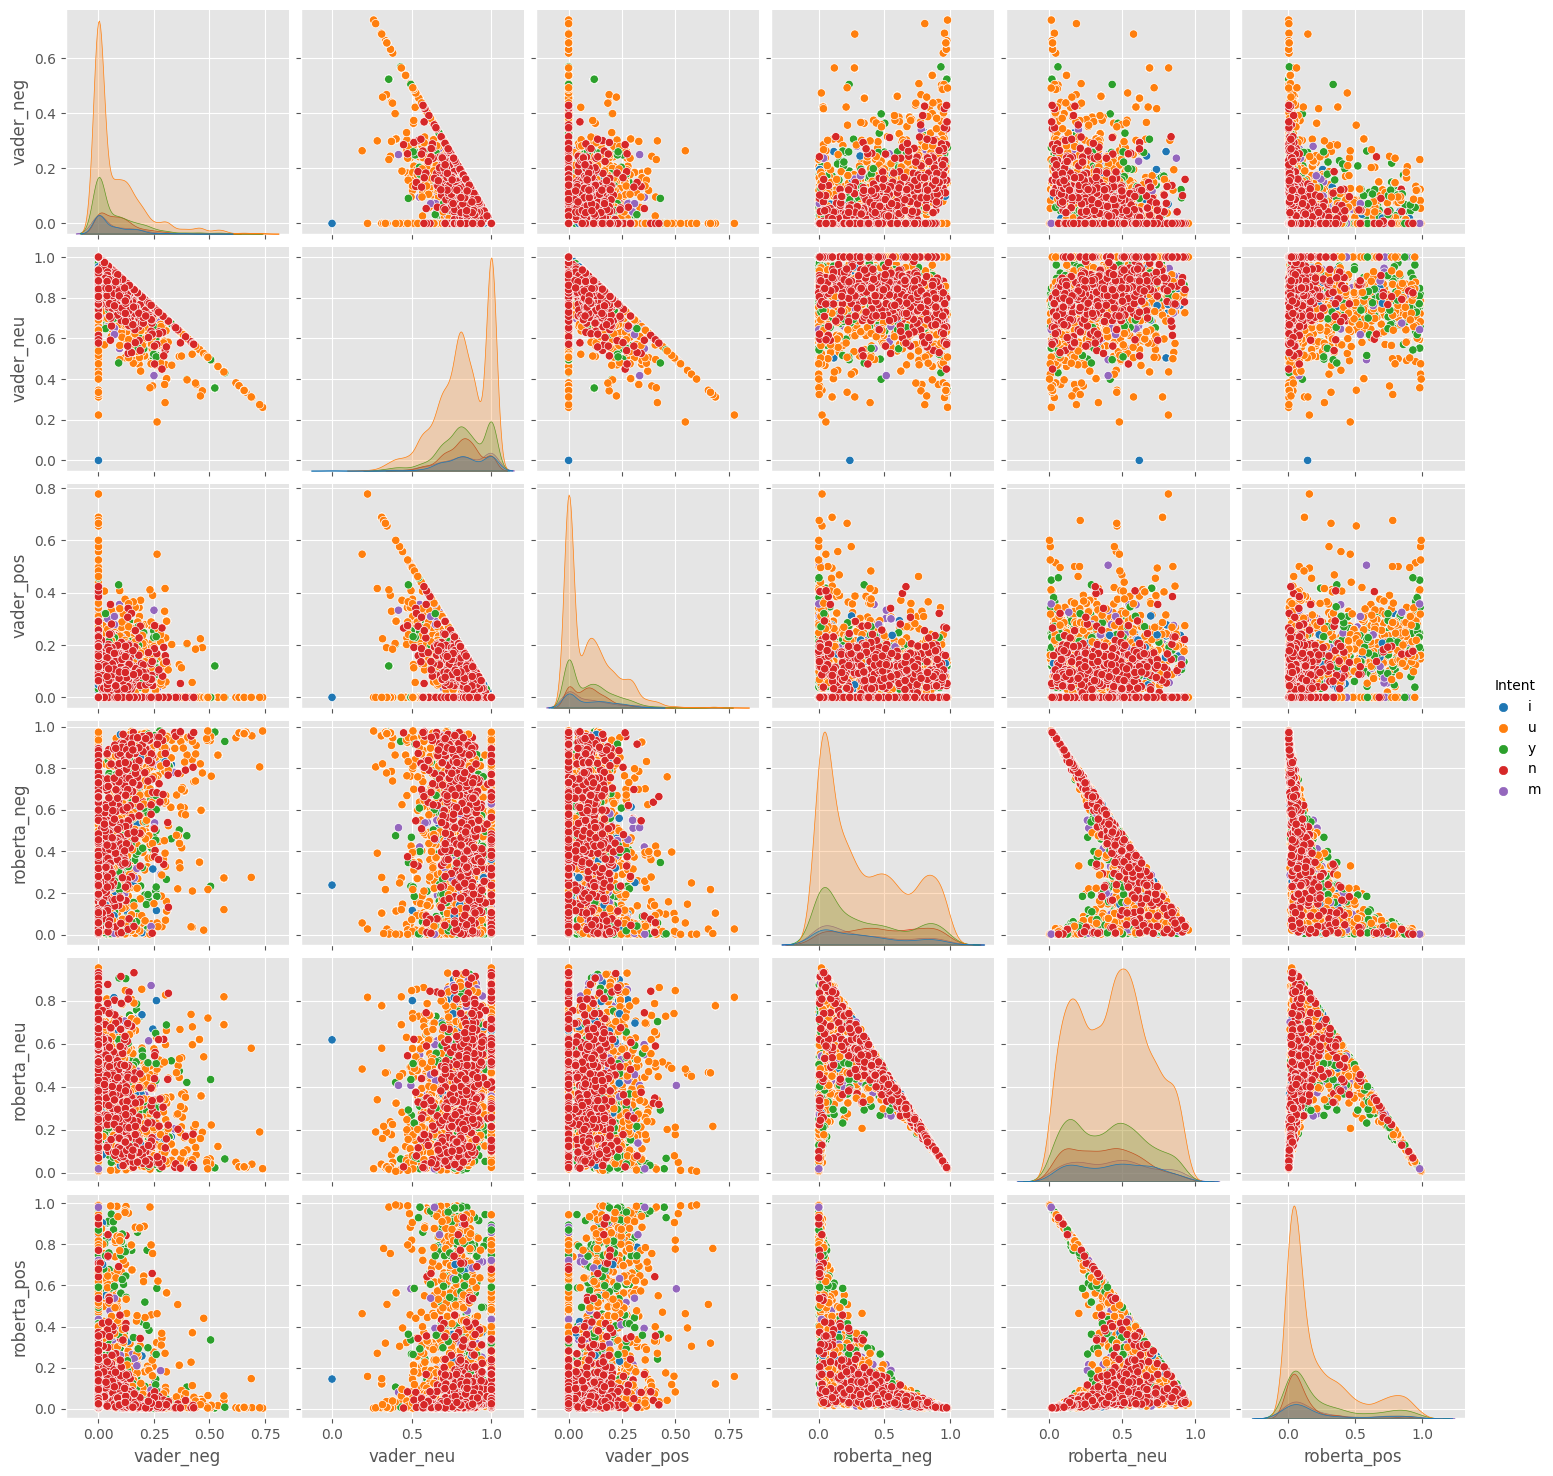

In [88]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Intent',
            palette='tab10')
plt.show()

Examples of positive sentiment identified correctly:

In [89]:
results_df.query('Intent == "y"') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I'm a boomer euroretard from Madrid. I have 5 GME €350, 500 BB and 1000 NOK. I love them. I'm holding to infinity and beyond!"

In [90]:
results_df.query('Intent == "y"') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

"If ARKG and IPOC and GME do well over the next month... maybe that'll be one of the few doubles I need. I'm deep in ARKG. If it goes up 10% my leaps go up around 30-40%. I'm thinking maybe the 10k I have in the ARKG ETF should just go into leaps as well. Then I'd have almost 20k in ARKG leaps, and if ARKG goes up 20%, I've almost doubled that 20k. And GME-- hope it keeps going up. I'll probably sell around 40 or 50 per share. IPOC? Dunno, but long term hold. And I have calls on that one too. And BABA leaps as of thursday.... Who the hell knows, but I hope I start making some money here soon. Want to buy more random shit for myself and eventually buy a house."

Examples of negative sentiment identified correctly:

In [91]:
results_df.query('Intent == "n"') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[1]

"It absolutely blows my mind that so many people and especially people on this sub are STILL using Robinhood despite what happened with the whole gamestop fiasco., There's still so many people using Robinhood after all the GME crap. And what really blows my mind is that I see people here on this very sub using Robinhood everyday? It absolutely baffles the living shit out of me as to why you are still using something that screwed you over, especially knowing very well that it could happen again and screw you over AGAIN. I don't want to see anyone who gets screwed over by Robinhood yet again complaining about it. You asked for it buddy.I know you stock market types only care about profit but godamn what kind of abusive relationship is this. This is mainly why I switched to the other market and projects like Merrymen who aim to undo this shit. What kind of abusive relationship do you people have with Robinhood. They give you a slick UI and you forget about all the wrongs they did to you? 

In [92]:
results_df.query('Intent == "n"') \
    .sort_values('vader_neg', ascending=False)['Text'].values[1]

"My puts on GME only lost 1% after the stock went from 20 to 40 percent up.  🤣🤣🤣.Now that's what I call IV."

Below are examples of misclassifications:

In [93]:
results_df.query('Intent == "y"') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'Saw the GME down to 126, is that the time to buy before it balloons again? Trying to buy low sell high but I missed out at $40 and can’t buy in at $300'

In [94]:
results_df.query('Intent == "n"') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"BTC puts, Could be a little late but yesterday I put some puts on BTC and they're starting to look good."

In [95]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [96]:
sent_pipeline('Exactly, oh well people thumbing this shit down just want to pump their bags and cash out on call premiums convincing people to buy them because”SQUEEZE WILL HAPPEN ANY DAY NOW GME $1000”. I feel bad, but mehhhhh, as more people blow up their accounts I hope a large chunk of them think twice about buying into a dead play. Oh well')

[{'label': 'NEGATIVE', 'score': 0.9977630376815796}]

In [97]:
sent_pipeline("PLEASE DON'T BE SMART AND SELL GME")

[{'label': 'NEGATIVE', 'score': 0.9995328187942505}]

In [98]:
sent_pipeline("PLEASE DON'T BE SMART AND BUY GME")

[{'label': 'NEGATIVE', 'score': 0.9993476271629333}]

In [99]:
sent_pipeline("only loosers would sell gamestop")

[{'label': 'NEGATIVE', 'score': 0.9728074073791504}]

In [100]:
sent_pipeline("only loosers would buy gamestop")

[{'label': 'NEGATIVE', 'score': 0.9890826940536499}]

In [101]:
sent_pipeline("🚀🚀🚀🚀🚀🚀🚀")

[{'label': 'NEGATIVE', 'score': 0.6970565319061279}]

In [102]:
sent_pipeline("🌙")

[{'label': 'NEGATIVE', 'score': 0.6970565319061279}]

In [103]:
sent_pipeline("💎🙌")

[{'label': 'NEGATIVE', 'score': 0.6970565319061279}]

In [104]:
sent_pipeline("apes 🦍")

[{'label': 'NEGATIVE', 'score': 0.7105834484100342}]

In [105]:
sent_pipeline("WE ARE PLUS 430!!! 🌙  🦍 WE ARE DOING IT. NOW KEEP HOLDING AND DONT GIVE INTO WHAT THEY WANT. IT WILL BE 600 BEFORE THE DAYS OUT AND THEN MONDAY IT WILL OPEN AT $1000 🤞 IF NOT THEN JUST A LITTLE LESS. BUY BUY BUY PEOPLE THIS IS STILL ONLY THE BEGINNING!!! AND DONT SELL WHEN YOU SEE THE DROP THIS MORNING THIS IS WHAT THEY WANT YOU TO DO AND THEN THEY WILL MAKE IT SO YOU CAN BUY ANYMORE STOCKS OR GAME STOP LIKE THEY DONE YESTERDAY BUT WE ARE NOT STUPID!! HOLDING AND NOT SELLING AND BUYING MORE HERE WHEN LAME ASS ROBINHOOD OPENS. HOLD HOLD HOLD. TO THE MOON🚀🚀🚀🚀🚀🚀🚀")

[{'label': 'NEGATIVE', 'score': 0.7619147300720215}]

In [106]:
# Recording the cleaned dataset as a new csv file to be used in future:
# Save the DataFrame to a CSV file
results_df.to_csv('/content/drive/MyDrive/CAPSTONE PROJECT LG/labelled_dataset_postNLP.csv', index=False)

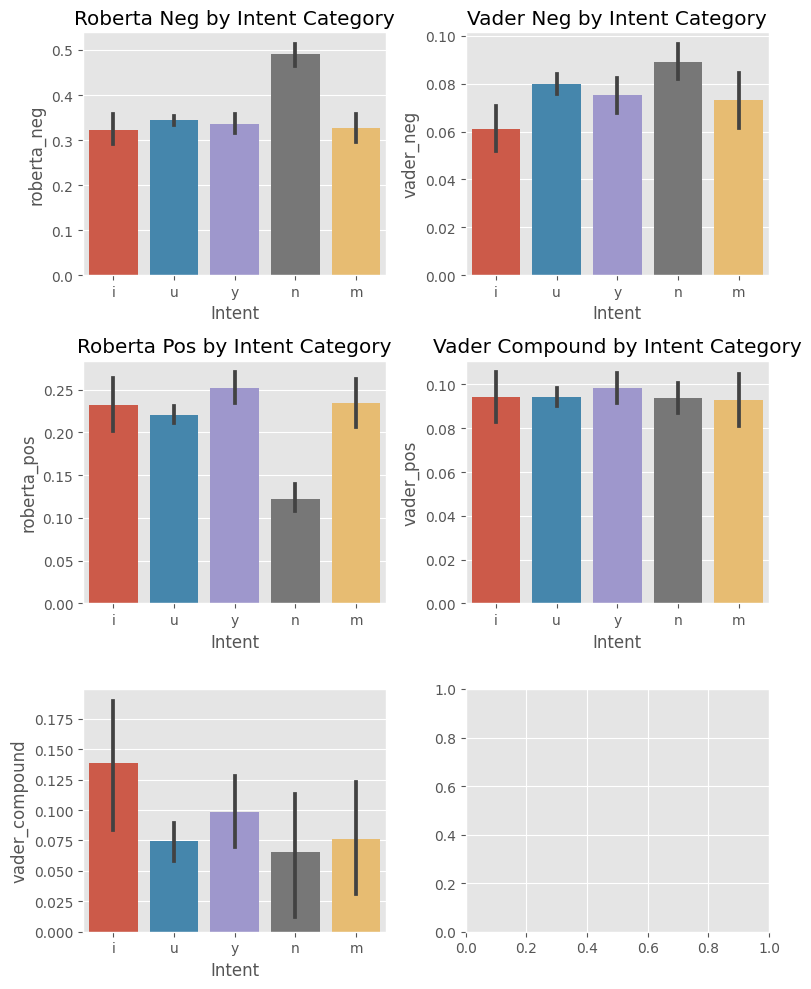

In [107]:
# Plotting graphs to show the distribution of Vader ratings
fig, axes = plt.subplots(3, 2, figsize=(8, 10))


sns.barplot(ax=axes[0, 0], data=results_df, x='Intent', y='roberta_neg')
axes[0, 0].set_title('Roberta Neg by Intent Category')

sns.barplot(ax=axes[0, 1], data=results_df, x='Intent', y='vader_neg')
axes[0, 1].set_title('Vader Neg by Intent Category')

sns.barplot(ax=axes[1, 0], data=results_df, x='Intent', y='roberta_pos')
axes[1, 0].set_title('Roberta Pos by Intent Category')

sns.barplot(ax=axes[1, 1], data=results_df, x='Intent', y='vader_pos')
axes[1, 1].set_title('Vader Pos by Intent Category')

sns.barplot(ax=axes[2, 0], data=results_df, x='Intent', y='vader_compound')
axes[1, 1].set_title('Vader Compound by Intent Category')


plt.tight_layout()
plt.show()

In [108]:
fig.savefig('/content/drive/MyDrive/CAPSTONE PROJECT LG/labelled_RoBERTa_sentiment.png', dpi=120)